<a href="https://colab.research.google.com/github/zevan07/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean(xs): 
    return sum(xs) / len(xs)

def variance(xs): 
    return sum([(x - mean(xs))**2 for x in xs]) / len(xs)

def stdv(xs): 
    return variance(xs) ** .5

def mvs(xs):
    return mean(xs), variance(xs), stdv(xs)

print(mvs(sales))

('Mean:', 3052.714285714286, 'Variance:', 183761.06122448976, 'Standard deviation:', 428.67360686714756)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def covariance(xs, ys, bias=False): 
    if bias:
        return sum([(x - mean(xs)) * (y - mean(ys)) for x,y in zip(xs, ys)]) / len(xs)
    else:
        return sum([(x - mean(xs)) * (y - mean(ys)) for x,y in zip(xs, ys)]) / (len(xs)-1)

sales_2 = [127, 80, 105, 92, 120, 115, 93]

print(covariance(sales, sales_2, bias=True))
print(np.cov(sales, sales_2, bias=True)[0][1])

6518.020408163265
6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
covariance(sales, sales_2) / (stdv(sales) * stdv(sales_2))
df0 = pd.DataFrame({'past_week':sales, 'last_week': sales_2})

print(np.cov(sales, sales_2, bias=True)[0][1]/ (stdv(sales) * stdv(sales_2)))
df0.corr()


0.9628339778148909


,past_week,last_week
past_week,1.000000,0.962834
last_week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [0]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
df.var()

Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

0.0


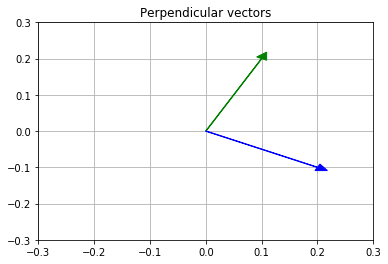

In [121]:
v0 = np.array([.1, .2])
v1 = np.array([.2, -.1])

print(np.dot(v0, v1))

plt.arrow(0,0, v0[0], v0[1], head_width=.02, head_length=.02, color='green' , zorder = 3)
plt.arrow(0,0, v1[0], v1[1], head_width=.02, head_length=.02, color='blue' , zorder = 3)
plt.xlim(-.3, .3)
plt.ylim(-.3, .3)
plt.title('Perpendicular vectors')
plt.grid(zorder = 2)
plt.show()

# it doesn't look like it, but they are perpendicular!

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
v0 = np.array([.1, .2])
v1 = np.array([.2, -.1])

print(np.dot(v0, v1))

# yes, because the dot product is equal to zero

0.0


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [106]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2)
print(np.dot(c, c))
print(np.matmul(c, c.T))

# they are identical!

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [112]:
f = np.array([[4, 12, 11, 9, 2]])
norm_f = np.linalg.norm(f)

unit_f = f / norm_f
print(unit_f)

[[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

0.10000000000000002


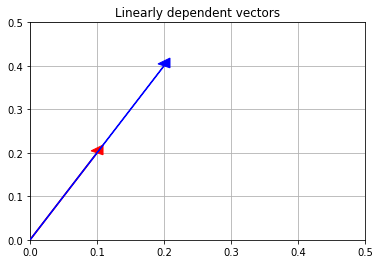

In [119]:
v0 = np.array([.1, .2])
v1 = np.array([.1*2, .2*2])

print(np.dot(v0, v1))

plt.arrow(0,0, v0[0], v0[1], head_width=.02, head_length=.02, color='red' , zorder = 3)
plt.arrow(0,0, v1[0], v1[1], head_width=.02, head_length=.02, color='blue' , zorder = 3)
plt.xlim(0, .5)
plt.ylim(0, .5)
plt.title('Linearly dependent vectors')
plt.grid(zorder = 2)
plt.show()

0.07


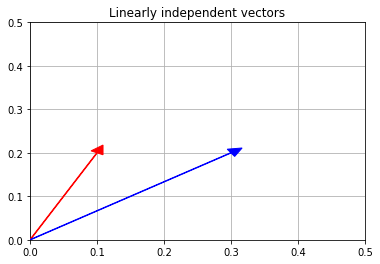

In [120]:
v0 = np.array([.1, .2])
v1 = np.array([.3, .2])

print(np.dot(v0, v1))

plt.arrow(0,0, v0[0], v0[1], head_width=.02, head_length=.02, color='red' , zorder = 3)
plt.arrow(0,0, v1[0], v1[1], head_width=.02, head_length=.02, color='blue' , zorder = 3)
plt.xlim(0, .5)
plt.ylim(0, .5)
plt.title('Linearly independent vectors')
plt.grid(zorder = 2)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [141]:
g = np.array([1, 2])
h = np.array([4, 8])
comb = (g + h)

np.linalg.matrix_rank([g, h])

# the span is just the line on which both g and h lie 
# since they are linearly dependent

2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [146]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

comb_1 = [l, m, n]


print(np.linalg.matrix_rank(comb_1))

# the span of l, m, n is all of 3D space since they are all linearly independent

3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



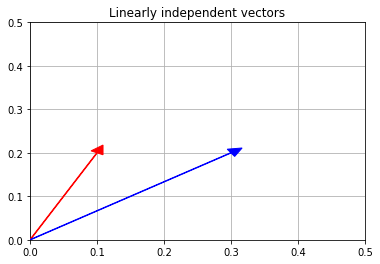

In [148]:
v0 = np.array([.1, .2])
v1 = np.array([.3, .2])

plt.arrow(0,0, v0[0], v0[1], head_width=.02, head_length=.02, color='red' , zorder = 3)
plt.arrow(0,0, v1[0], v1[1], head_width=.02, head_length=.02, color='blue' , zorder = 3)
plt.xlim(0, .5)
plt.ylim(0, .5)
plt.title('Linearly independent vectors')
plt.grid(zorder = 2)
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors form a basis of a given space if in combination they are capable of spaning all of that space. In the above example, the vectors v0 and v1 can be combined to span all of 2D space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [152]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

print('The matrix rank is: ', np.linalg.matrix_rank(P))

The matrix rank is:  3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us how many dimensions of vector space the matrix spans. So if a matrix has a rank of 1, it spans only one dimension of vector space (a single line).

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

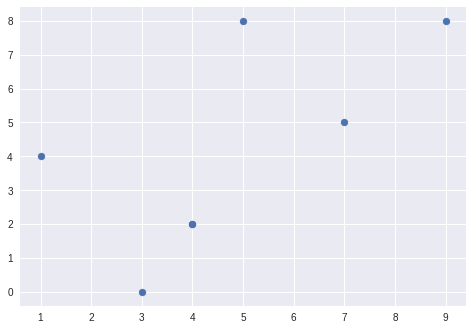

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()